In [2]:
import cv2
import numpy as np
import os

date = "0108_keijo"

input_folders = [
    f"/home/data/{date}/org/A",
    f"/home/data/{date}/org/B",
    f"/home/data/{date}/org/C",
]

mask_output_folders = [
    f"/home/data/{date}/maskBB/A",
    f"/home/data/{date}/maskBB/B",
    f"/home/data/{date}/maskBB/C",
]
    
crop_output_folders = [
    f"/home/data/{date}/cropBB/A",
    f"/home/data/{date}/cropBB/B",
    f"/home/data/{date}/cropBB/C",
]

maskedimg_output_folders = [
    f"/home/data/{date}/maskedBB/A",
    f"/home/data/{date}/maskedBB/B",
    f"/home/data/{date}/maskedBB/C",
]

# 出力フォルダを作成
for folder in mask_output_folders:
    os.makedirs(folder, exist_ok=True)
for folder in crop_output_folders:
    os.makedirs(folder, exist_ok=True)
for folder in maskedimg_output_folders:
    os.makedirs(folder, exist_ok=True)

for input_folder, mask_output_folder,crop_output_folder,maskedimg_output_folder in zip(input_folders, mask_output_folders,crop_output_folders,maskedimg_output_folders):
    for file in os.listdir(input_folder):
        # 画像ファイルのみを処理
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.JPEG')):
            name = os.path.basename(file).replace(".JPEG", "")
            file_path = os.path.join(input_folder, file)

            # 画像を読み込む
            image = cv2.imread(file_path)

            # BGRからHSVに変換
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # 青色の範囲を定義
            lower_blue = np.array([20, 100, 100])
            upper_blue = np.array([255, 255, 255])

            # ブルーバックのマスクを作成
            mask = cv2.inRange(hsv, lower_blue, upper_blue)

            # マスクの反転（対象物を白、背景を黒にする）
            mask_inv = cv2.bitwise_not(mask)

            # 境界を検出
            contours, _ = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # 最大の輪郭を取得
            largest_contour = max(contours, key=cv2.contourArea)

            # 対象物を切り取るための境界ボックスを取得
            x, y, w, h = cv2.boundingRect(largest_contour)
            cropped_image = image[y:y+h, x:x+w]
            cropped_mask = mask_inv[y:y+h, x:x+w]
            masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=cropped_mask)
            
            mask_output_file_path = os.path.join(mask_output_folder, file)
            crop_output_file_path = os.path.join(crop_output_folder, file)
            maskedimg_output_file_path = os.path.join(maskedimg_output_folder, file)
        
            # 切り取った画像を保存
            cv2.imwrite(mask_output_file_path, cropped_mask)
            cv2.imwrite(crop_output_file_path, cropped_image)
            cv2.imwrite(maskedimg_output_file_path, masked_cropped_image)


In [4]:
import cv2
import numpy as np
import os
file_path = "/home/data/1216_jikunashi/org/C/IMG_1706.JPEG"

# 画像を読み込む
image = cv2.imread(file_path)

# BGRからHSVに変換
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 青色の範囲を定義
lower_blue = np.array([20, 100, 100])
upper_blue = np.array([255, 255, 255])

# ブルーバックのマスクを作成
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# マスクの反転（対象物を白、背景を黒にする）
mask_inv = cv2.bitwise_not(mask)

# 境界を検出
contours, _ = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 最大の輪郭を取得
largest_contour = max(contours, key=cv2.contourArea)

# 対象物を切り取るための境界ボックスを取得
# x, y, w, h = cv2.boundingRect(largest_contour)
cropped_image = image
cropped_mask = mask_inv
masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=cropped_mask)

# 切り取った画像を保存
cv2.imwrite("/home/data/1216_jikunashi/cropped_mask.JPEG", cropped_mask)
cv2.imwrite("/home/data/1216_jikunashi/cropped_image.JPEG", cropped_image)
cv2.imwrite("/home/data/1216_jikunashi/masked_cropped_image.JPEG", masked_cropped_image)


True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('/home/data/0203_energee_after/org/B/IMG_1703.JPEG')

# BGRからHSVに変換
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 青色の範囲を定義
lower_blue = np.array([20, 100, 100])
upper_blue = np.array([255, 255, 255])

# ブルーバックのマスクを作成
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# マスクの反転（対象物を白、背景を黒にする）
mask_inv = cv2.bitwise_not(mask)

# 境界を検出
contours, _ = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 最大の輪郭を取得
largest_contour = max(contours, key=cv2.contourArea)

# 対象物を切り取るための境界ボックスを取得
x, y, w, h = cv2.boundingRect(largest_contour)
cropped_image = image[y:y+h, x:x+w]

cropped_mask = mask_inv[y:y+h, x:x+w]

# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(mask_inv, cmap='gray')
# plt.title('Mask')

# plt.subplot(1, 3, 3)
# plt.imshow(cv2.cvtColor(cropped_mask, cv2.COLOR_BGR2RGB))
# plt.title('Cropped Image')

# plt.show()
#Mask保存
cv2.imwrite("/home/data/0203_energee_after/cropedmask.JPEG", mask_inv)

True

305649


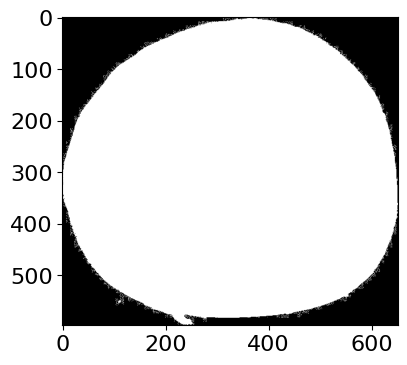

In [13]:
#画像の大きさを見るだけ
# img = cv2.imread('/home/data/0203_energee_after/maskBB/C/IMG_1929.JPEG')#小さいの1698,1929,1903
img = cv2.imread('/home/data/0203_energee_after/maskBB/B/IMG_1824.JPEG')#大きいの1824
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
count = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] != 0:
            count += 1
print(count)
plt.figure(figsize=(10, 4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title('直行座標系', fontsize=20)
# plt.axis('off')
plt.tick_params(axis='both', which='major', labelsize=16)  # 目盛りラベルのサイズ
plt.show()